<a href="https://colab.research.google.com/github/SirilukLee/MachineLerning-KMITL/blob/main/My_simple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solving A Simple Classification Problem with Python

[Credit](https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2)

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [6]:
print(fruits.shape)

(59, 7)


In [7]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

##Exporing data: fruit type distribution

In [8]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


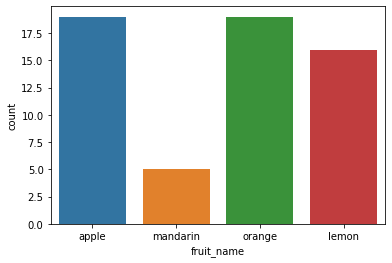

In [9]:
import seaborn as sns
sns.countplot(fruits['fruit_name'], label="Count")
plt.show()

The data is pretty balanced except mandarin. We will just have to go with it.

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

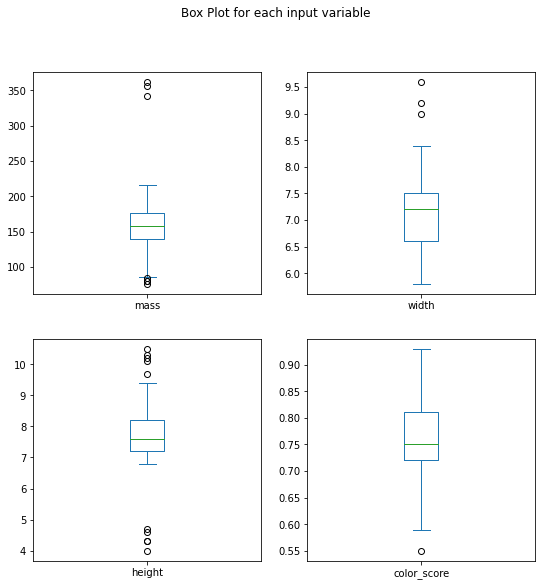

In [10]:
new_fruits = fruits.drop('fruit_label', axis=1)
new_fruits.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

##Create training and test sets

In [21]:
from sklearn.model_selection import train_test_split

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

##Apply scalling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_test

array([[1.02142857, 1.11764706, 0.8       , 0.5       ],
       [0.26428571, 0.38235294, 0.6       , 0.52631579],
       [0.42142857, 0.41176471, 0.96923077, 0.39473684],
       [0.22857143, 0.26470588, 0.47692308, 0.44736842],
       [0.34285714, 0.38235294, 0.55384615, 0.97368421],
       [0.35714286, 0.47058824, 0.49230769, 0.13157895]])

##Build Models

###Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


###Setting max decision tree depth to help avoid overfitting

In [27]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train) #tune parameter เช่นปรับ max_depth
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.67


##Visualize the tree

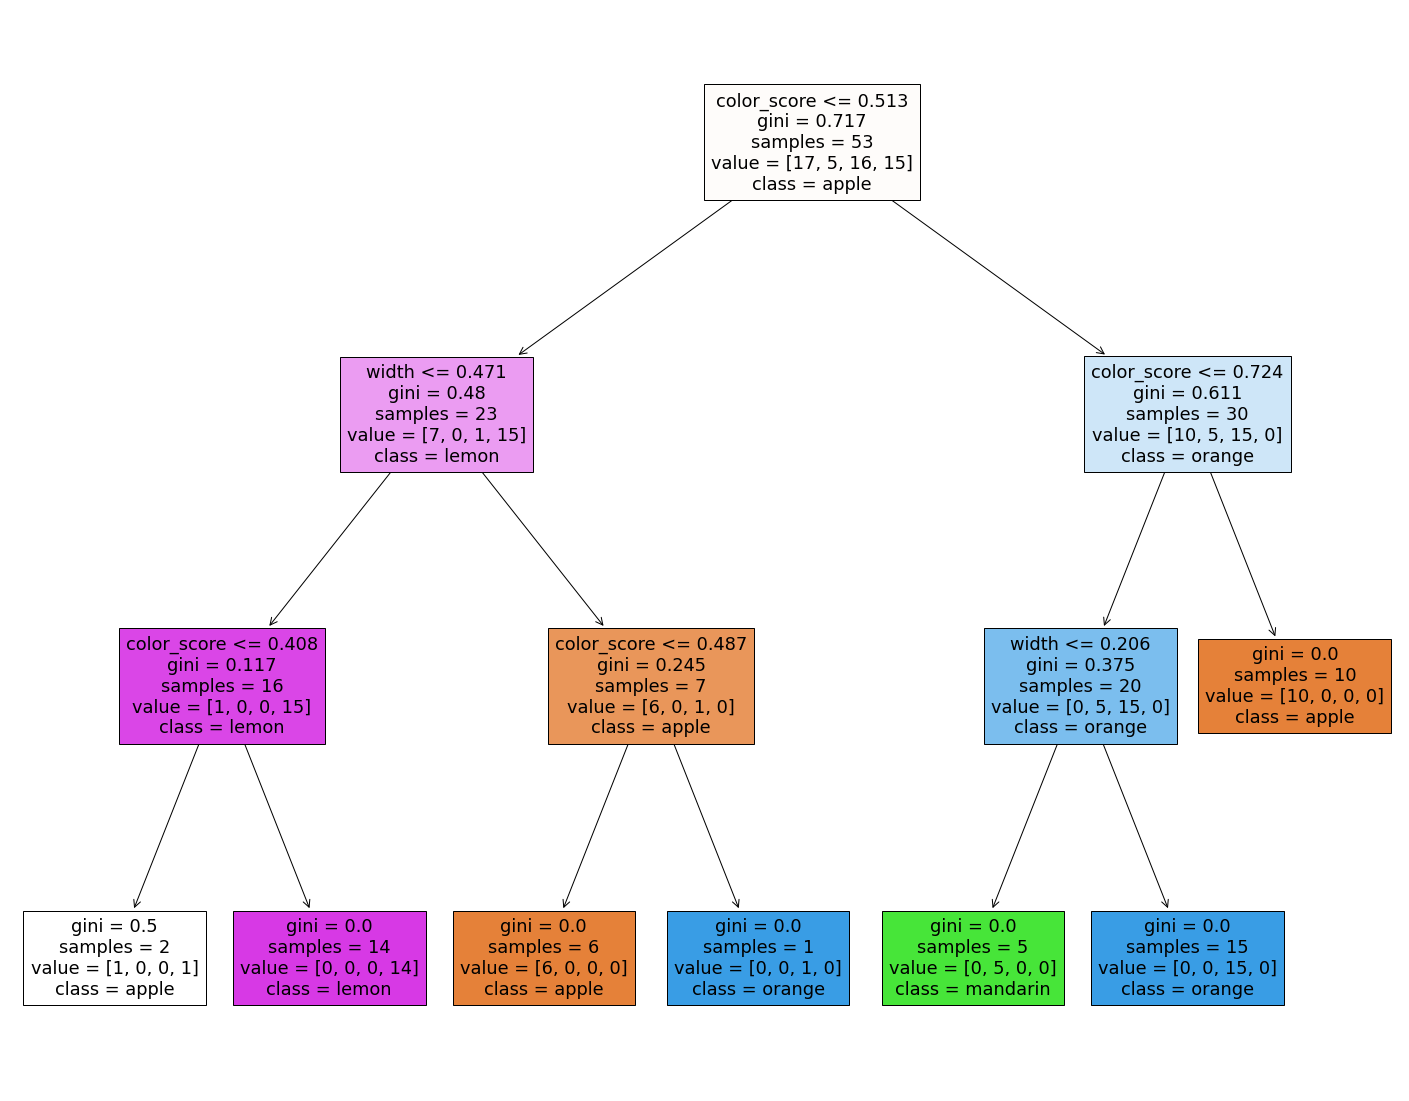

In [28]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2, 
                   feature_names=feature_names,  
                   class_names=fruits['fruit_name'].unique(), filled=True)